### This code was used for visualization of junction in $E_C, E_J$ space. The JJ calculator code is appended at the end of this notebook. Run that first before starting any plotting. 

<function matplotlib.pyplot.show(*args, **kw)>

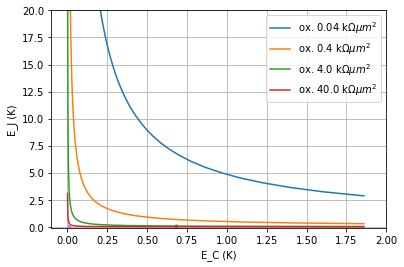

In [4]:
oxidation = [0.04E3, 0.4E3, 4E3, 40E3]
widthUM = np.linspace(0.1, 4, 500)
EJarr = np.zeros(len(widthUM))
ECarr = np.zeros(len(widthUM))

for i,rho in enumerate(oxidation):
    for j,w in enumerate(widthUM):
        EJarr[j] = EJEC(Rs_JJ=rho, JJwidthUM=w, metalTHKUM=250E-4, Tc=1.34)[0]
        ECarr[j] = EJEC(Rs_JJ=rho, JJwidthUM=w, metalTHKUM=250E-4, Tc=1.34)[1]
    plt.plot(ECarr, EJarr, label = r'ox. {} k$\Omega\mu m^2$'.format(rho/1E3))
    
plt.legend(loc = 1)
plt.xlabel('E_C (K)')
plt.ylabel('E_J (K)')
plt.plot([8E-3, 8E-3],[10E-3, 50E-3]) #MBL targeting state
plt.plot(0.683, 0.043, '.') #bare 200kohm junction
plt.plot(0.008, 0.043, '.') #200kohm junction with EC0 = 8mK
plt.grid()

plt.xlim(-0.1,2)
plt.ylim(-0.1,20)

plt.show


#### First of all, $E_C(w^{-2})$ and $E_J(w^2)$ are parameterized by JJ width $w$ , and $E_C*E_J$ should be a constant against $w$. <font color="blue">Increasing</font> $w$ means moving towards the <font color="blue">left</font> along the constant curve. Higher oxidation curve locates closer to the origin point.

#### Here I plotted our JJ oxidation constant curve (again, $E_C*E_J$ is independent of $w$) for $1k\Omega/JJ, 10k\Omega/JJ, 100k\Omega/JJ$, and atm non-existent recipe for $1M\Omega/JJ$ (red).

<function matplotlib.pyplot.show(*args, **kw)>

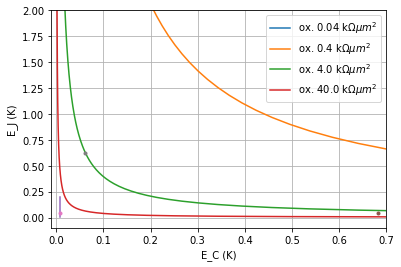

In [5]:
oxidation = [0.04E3, 0.4E3, 4E3, 40E3]
# oxidation = np.linspace(0.4E3, 4E3, 4)
widthUM = np.linspace(0.1, 4, 500)
EJarr = np.zeros(len(widthUM))
ECarr = np.zeros(len(widthUM))

for i,rho in enumerate(oxidation):
    for j,w in enumerate(widthUM):
        EJarr[j] = EJEC(Rs_JJ=rho, JJwidthUM=w, metalTHKUM=250E-4, Tc=1.34)[0]
        ECarr[j] = EJEC(Rs_JJ=rho, JJwidthUM=w, metalTHKUM=250E-4, Tc=1.34)[1]
    plt.plot(ECarr, EJarr, label = r'ox. {} k$\Omega\mu m^2$'.format(rho/1E3))
    
plt.legend(loc = 1)
plt.xlabel('E_C (K)')
plt.ylabel('E_J (K)')
plt.plot([8E-3, 8E-3],[10E-3, 200E-3]) #MBL targeting state
plt.plot(0.683, 0.043, '.') #bare 200kohm junction
plt.plot(0.008, 0.043, '.') #200kohm junction with EC0 = 8mK
plt.plot(0.062, 0.62, '.')
plt.grid()

plt.xlim(-0.01,0.7)
plt.ylim(-0.1,2)

plt.show


#### Now, after zooming in I plotted our MBL targeting state as the pink dot in the lower left. The purple point on the right (0.683, 0.043) indicated the bare $200k\Omega/JJ$ juntion, and the pink on the left indicated the "properly-shunted' one $(E_C = 8mK, E_J = 43mK)$  which is our dreaming device. I also plotted the purple verticle line for the case of 20x tuning of $E_J$ through B-field in SQUID. 

#### If we want to bring down $E_C$ not through $C_0$ but through $C_{JJ}$ itself, we will need to slide through the oxidation curve which is a bit higher than the red one, $1M\Omega/JJ$. By tuning $w$ up to $1.5\mu m*1.5\mu m$, we will have $E_C$ ~ 8mK. But with current oxidation (green curve) this $w$ give $E_J$ as high as 4K, which makes it not-realistic to verify $P(E)$ theory since we didn't see $I_C$ degradation at that high $E_J$ anyway.

#### As a result I suggest we proceed as below: 
- A. Verify $P(E)$ theory with smaller $w$ such as  $np.linspace(0.2, 0.7, 9)$. 
- B. Keep working on high oxidation recipe to see what's our limit, and decide proper $w$ upon that.

<function matplotlib.pyplot.show(*args, **kw)>

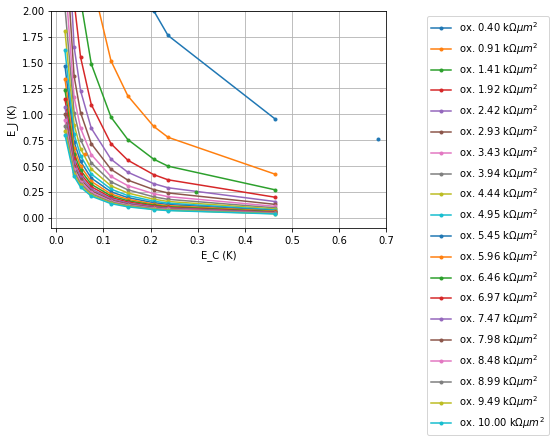

In [4]:
# oxidation = [0.04E3, 0.4E3, 4E3, 40E3]
oxidation = np.linspace(0.4E3, 10E3, 20)
widthUM = np.linspace(0.2, 0.7, 9)
widthUM = [.2, .28, .3, .35, .4, .5, .6, .7, 1]
EJarr = np.zeros(len(widthUM))
ECarr = np.zeros(len(widthUM))

for i,rho in enumerate(oxidation):
    for j,w in enumerate(widthUM):
        EJarr[j] = EJEC(Rs_JJ=rho, JJwidthUM=w, metalTHKUM=250E-4, Tc=1.34)[0]
        ECarr[j] = EJEC(Rs_JJ=rho, JJwidthUM=w, metalTHKUM=250E-4, Tc=1.34)[1]
    plt.plot(ECarr, EJarr, '.-', label = r'ox. {:.2f} k$\Omega\mu m^2$'.format(rho/1E3))
   
plt.legend(bbox_to_anchor=(1.5,1), loc = 1)
plt.xlabel('E_C (K)')
plt.ylabel('E_J (K)')
# plt.plot([8E-3, 8E-3],[10E-3, 50E-3]) #MBL targeting state
plt.plot(0.683, 0.762, '.') #bare 10kohm junction
# plt.plot(0.683, 0.043, '.') #bare 200kohm junction
# plt.plot(0.008, 0.043, '.') #200kohm junction with EC0 = 8mK
plt.plot(0.062, 0.62, '.')
plt.plot(0.297, 0.254, '.')
plt.grid()

plt.xlim(-0.01,0.7)
plt.ylim(-0.1,2)

plt.show

#### I suggest to do width split $w = np.linspace(0.2, 0.7, 9)$. This should be able to provide JJ has similar $E_J = 0.75K$ which we already saw pronounced $I_C$ degradation for oxidation curves corresponding to $0.4k\Omega\mu m^2 (30k\Omega/JJ)$ to $10k\Omega\dot\mu m^2 (100k\Omega/JJ)$. (in case there's some shifts in oxidation condition) 

#### Again, the $R/JJ$ we are looking for in this task ($P(E)$ verification) is somewhere at $10k\Omega/JJ, E_J=0.75K$. 

#### A quick plotting below shows that in order to get to the proper oxidation without $C_0$ we will need oxidation condition <font color="red">100</font>  times higher that existing recipe. (purple curve below)

<function matplotlib.pyplot.show(*args, **kw)>

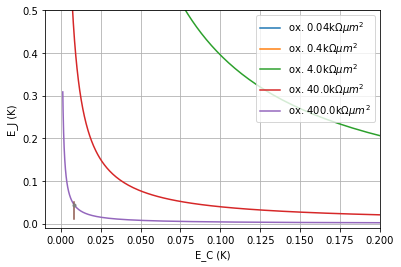

In [3]:
oxidation = [0.04E3, 0.4E3, 4E3, 40E3, 400E3]
# oxidation = np.linspace(0.4E3, 4E3, 4)
widthUM = np.linspace(0.1, 4, 500)
EJarr = np.zeros(len(widthUM))
ECarr = np.zeros(len(widthUM))

for i,rho in enumerate(oxidation):
    for j,w in enumerate(widthUM):
        EJarr[j] = EJEC(Rs_JJ=rho, JJwidthUM=w, metalTHKUM=250E-4, Tc=1.34)[0]
        ECarr[j] = EJEC(Rs_JJ=rho, JJwidthUM=w, metalTHKUM=250E-4, Tc=1.34)[1]
    plt.plot(ECarr, EJarr, label = r'ox. {}k$\Omega\mu m^2$'.format(rho/1E3))
    
plt.legend(loc = 1)
plt.xlabel('E_C (K)')
plt.ylabel('E_J (K)')
plt.plot([8E-3, 8E-3],[10E-3, 50E-3]) #MBL targeting state
plt.plot(0.683, 0.043, '.') #bare 200kohm junction
plt.plot(0.008, 0.043, '.') #200kohm junction with EC0 = 8mK
plt.grid()

plt.xlim(-0.01,0.2)
plt.ylim(-0.01,0.5)

plt.show


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 13 14:53:16 2019

@author: racco
"""

# -*- coding: utf-8 -*-
"""
Created on Tue Sep 04 17:45:43 2018 @author: wsLu
"""
from math import *
import scipy.constants as const
from scipy.special import ellipk
import numpy as np
import matplotlib.pyplot as plt
import time
from si_prefix import si_format

roundN = 5

def JJparameters(RN, JJwidthUM=0.2, metalTHK=250E-10, Tc=1.34):
    
    Rs_JJ = RN * ( (JJwidthUM*1E-6 + 2*metalTHK) *JJwidthUM*1E-6 )
    IAB = const.pi *1.764 *const.k *Tc /2 /const.e /RN 
    EJ_JJ = const.h /2 /const.e /2 /const.pi *IAB
    C_JJ = 50E-15 *JJwidthUM *JJwidthUM 
    EC_JJ = const.e *const.e /2 /C_JJ
    C0 = ParplateCap(area= 56*1E-12 , dielecTHK=10E-9, epsilon = 9.34*const.epsilon_0)
#    C0 = 1E-99
    EC0 = const.e *const.e /2 /C0
    
    freqPlasma = sqrt(2 *const.e *IAB *2*const.pi /const.h /max(C0,C_JJ)) /2/const.pi
    Q = freqPlasma*2*pi *RN *max(C0,C_JJ)
#    ParplateCap(area= JJwidthUM*JJwidthUM*1E-12 , dielecTHK=1E-9, epsilon = 9.34*8.828E-12)
#    return [IAB, EJ]
    return "[RN_JJ (kohm), Rs_JJ (kohm-um^2)] = " + format([round(RN/1E3, roundN), round(Rs_JJ/1E3/1E-12, roundN)]) + "\n[I_AB (nA), EJ (mK)] = " + format([round(IAB/1E-9, roundN), round(EJ_JJ/1E-3/const.k, roundN)]) + "\n[C_JJQP (fF), EC (mK)] = " + format([round(C_JJ/1E-15, roundN), round(EC_JJ/1E-3/const.k, roundN)]) + "\n[C0 (fF), EC0 (mK)] = " + format([round(C0/1E-15, roundN), round(EC0/1E-3/const.k, roundN)]) + "\n[Freq_plasma (GHz))] = " + format([round(freqPlasma/1E9, roundN)])+ "\n[Q, Beta, EJ/EC] = " + format([round(Q, 1), round(Q*Q, 1), round(EJ_JJ/min(EC0,EC_JJ), 1)])
#    return RN, round(Rs_JJ/1E3/1E-12, roundN), IAB, EJ_JJ/const.k, round(C_JJ/1E-15, roundN), round(EC_JJ/1E-3/const.k, roundN), round(C0/1E-15, roundN), round(EC0/1E-3/const.k, roundN), round(freqPlasma/1E9, roundN), round(Q, 1), round(Q*Q, 1), round(EJ_JJ/min(EC0,EC_JJ), 1)

def EJEC(Rs_JJ, JJwidthUM, metalTHKUM=250E-4, Tc=1.34):
    
    RN = Rs_JJ / ( (JJwidthUM + 2*metalTHKUM) *JJwidthUM )
    IAB = const.pi *1.764 *const.k *Tc /2 /const.e /RN 
    EJ_JJ = const.h /2 /const.e /2 /const.pi *IAB
    C_JJ = 50E-15 *JJwidthUM *JJwidthUM 
    EC_JJ = const.e *const.e /2 /C_JJ
    C0 = ParplateCap(area= 56*1E-12 , dielecTHK=10E-9, epsilon = 9.34*const.epsilon_0)
    EC0 = const.e *const.e /2 /C0
    
    freqPlasma = sqrt(2 *const.e *IAB *2*const.pi /const.h /max(C0,C_JJ)) /2/const.pi
    Q = freqPlasma*2*pi *RN *max(C0,C_JJ)
    return [EJ_JJ/const.k, EC_JJ/const.k]

def CfromIVCoffset(IVCoffset):
    """
    Extract C from IV curve V offset for high Ibias branch with V = IR +e/2C
    IVCoffset: V offset from linear fits of IVC at high Ibias branch (V)
    return: C per JJ (fF/JJ)
    """
    C = const.e /2 /IVCoffset *1E15 *30 /2
#    return C
    return "C_IVCoffset/JJ (fF/JJ) = " + format(round(C, roundN))

def ParplateCap(area, dielecTHK, epsilon = 9.34*const.epsilon_0):
    """
    """
    C = epsilon *area /dielecTHK
    return C
#    return "C_parallelPlate (fF) = " + format(C *1E15)

def tiltedWashboardU(EJKBT, IbiasArr, ax):

   phi = np.arange(-0.1*np.pi, 8*np.pi, 0.025*np.pi)
   UArr=[]
   for Ibias in IbiasArr:
       U = -EJKBT*const.k*np.cos(phi) - const.h /2/np.pi /2/const.e *Ibias *phi
       UArr.append(U)

   ax.set_title('Tilted washboard', fontsize=16, fontweight='bold')
   ax.set_xlabel('$\phi$ (pi)')
   ax.set_ylabel('U (K)')

   i = 0   
   for i,U in enumerate(UArr):
       ax.plot(phi/np.pi, U/const.k,label = 'I$_b$ =' + format(si_format(IbiasArr[i])) + 'A')

   ax.text(0.82, 0.94, 'E$_J$ =' + format(si_format(EJKBT)) + 'K\n', verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes,color='black', fontsize=12)
   ax.grid(True)   
   ax.legend()

In [5]:
# current, 169torr 10+4min. 
print (JJparameters(RN=83E3/8, JJwidthUM=sqrt(.177*.642), metalTHK=250E-10, Tc=1.34))

[RN_JJ (kohm), Rs_JJ (kohm-um^2)] = [10.375, 1.35382]
[I_AB (nA), EJ (mK)] = [30.83954, 735.12388]
[C_JJQP (fF), EC (mK)] = [5.6817, 163.61735]
[C0 (fF), EC0 (mK)] = [463.10944, 2.00735]
[Freq_plasma (GHz))] = [2.26394]
[Q, Beta, EJ/EC] = [68.3, 4671.2, 366.2]


In [8]:
# b/f ion gun installation, most oxidized recipe: 120torr 20min. 
print (JJparameters(RN=2000E3/10, JJwidthUM=sqrt(.17*.17), metalTHK=250E-10, Tc=1.34))

[RN_JJ (kohm), Rs_JJ (kohm-um^2)] = [200.0, 7.48]
[I_AB (nA), EJ (mK)] = [1.5998, 38.13455]
[C_JJQP (fF), EC (mK)] = [1.445, 643.33889]
[C0 (fF), EC0 (mK)] = [463.10944, 2.00735]
[Freq_plasma (GHz))] = [0.51564]
[Q, Beta, EJ/EC] = [300.1, 90048.0, 19.0]


In [3]:
print (EJEC(Rs_JJ=7E3, JJwidthUM=2, metalTHKUM=250E-4, Tc=1.34))

[4.467190271162962, 0.004648123485183085]
